In [ ]:
!wget https://archive.ics.uci.edu/static/public/320/student+performance.zip
!unzip student+performance.zip

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load data
math_df = pd.read_csv("student/student-mat.csv", sep=";")
por_df = pd.read_csv("student/student-por.csv", sep=";")

# Combine datasets with a 'subject' column
math_df['subject'] = 'Math'
por_df['subject'] = 'Portuguese'
df = pd.concat([math_df, por_df], ignore_index=True)


In [ ]:
nominal_features = ['Mjob', 'Fjob', 'reason', 'guardian']
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)
# Label encoding for binary features
binary_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                   'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
                   'romantic']
label_enc = LabelEncoder()
for col in binary_features:
    df[col] = label_enc.fit_transform(df[col])

# Normalize numerical features
scaler = MinMaxScaler()
# numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
numeric_features = ['age', 'Medu', 'Fedu', 'failures', 
                    'famrel', 'goout', 'Dalc', 'Walc', 'health', 'absences']

score_features = ['G1', 'G2', 'G3']
df[score_features] = scaler.fit_transform(df[score_features])
df['absences'] = pd.cut(df['absences'], bins=[-1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=False)
time_features = ['traveltime', 'studytime', 'freetime', 'absences']
lifestyle_features = ['freetime', 'goout', 'Dalc', 'Walc', 'activities', 'romantic']
family_features = ['Pstatus', 'Medu', 'Fedu', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']
condition = ['paid', 'internet', 'schoolsup', 'famsup']

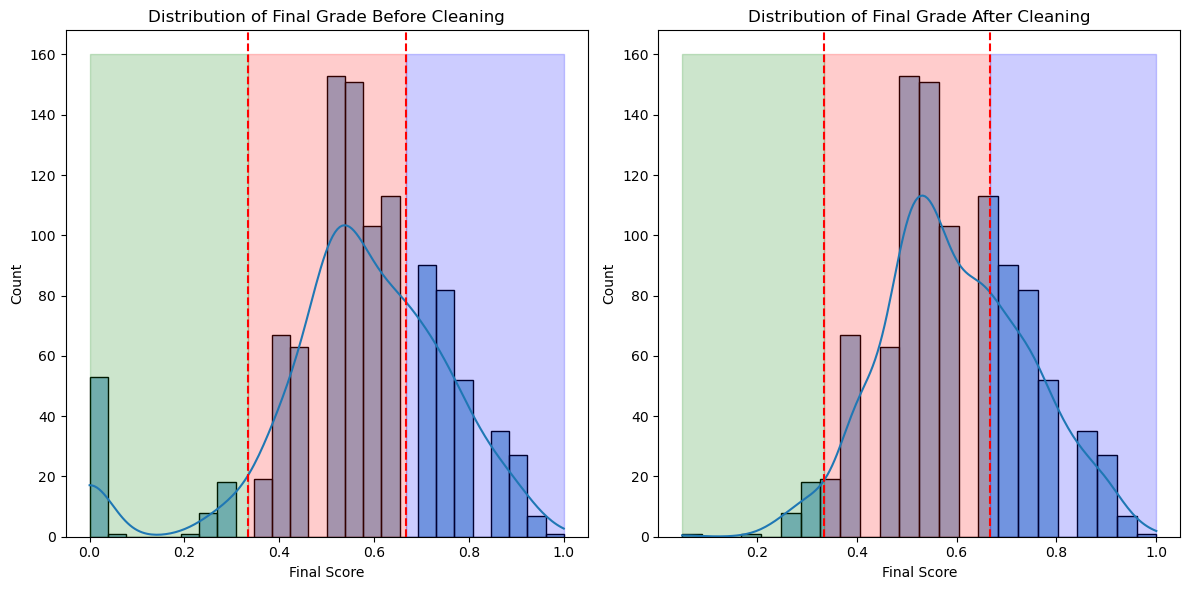

In [3]:
def draw_G3(df, ax, title):
    max_score = df['G3'].max()
    min_score = df['G3'].min()
    threshold_0 = max_score * 2/3
    threshold_1 = max_score * 1/3
    sns.histplot(df['G3'], kde=True, ax=ax)
    ax.axvline(threshold_0, color='r', linestyle='--')
    ax.axvline(threshold_1, color='r', linestyle='--')
    ax.fill_between([threshold_0, threshold_1], 0, 160, color='red', alpha=0.2)
    ax.fill_between([threshold_1, min_score], 0, 160, color='green', alpha=0.2)
    ax.fill_between([threshold_0, max_score], 0, 160, color='blue', alpha=0.2)
    ax.set_xlabel('Final Score')
    ax.set_ylabel('Count')
    ax.set_title(title)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
draw_G3(df, ax=axes[0], title='Distribution of Final Grade Before Cleaning')
draw_G3(df[df['G3'] > 0], ax=axes[1], title='Distribution of Final Grade After Cleaning')
plt.tight_layout()
plt.show()


In [4]:
df = df[df['G3'] > 0]
max_score = df['G3'].max()
min_score = df['G3'].min()
threshold_0 = 2/3
threshold_1 = 1/3
df['grade'] = df['G3'].apply(lambda x: 1 if x >= threshold_0 else 0 if x >= threshold_1 else -1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,grade
0,0,0,18,1,0,0,4,4,2,2,...,False,False,False,True,False,False,False,True,False,-1
1,0,0,17,1,0,1,1,1,1,2,...,False,True,False,False,False,False,False,False,False,-1
2,0,0,15,1,1,1,1,1,1,2,...,False,True,False,False,False,True,False,True,False,0
3,0,0,15,1,0,1,4,2,1,3,...,False,False,True,False,True,False,False,True,False,1
4,0,0,16,1,0,1,3,3,1,2,...,False,True,False,False,True,False,False,False,False,0


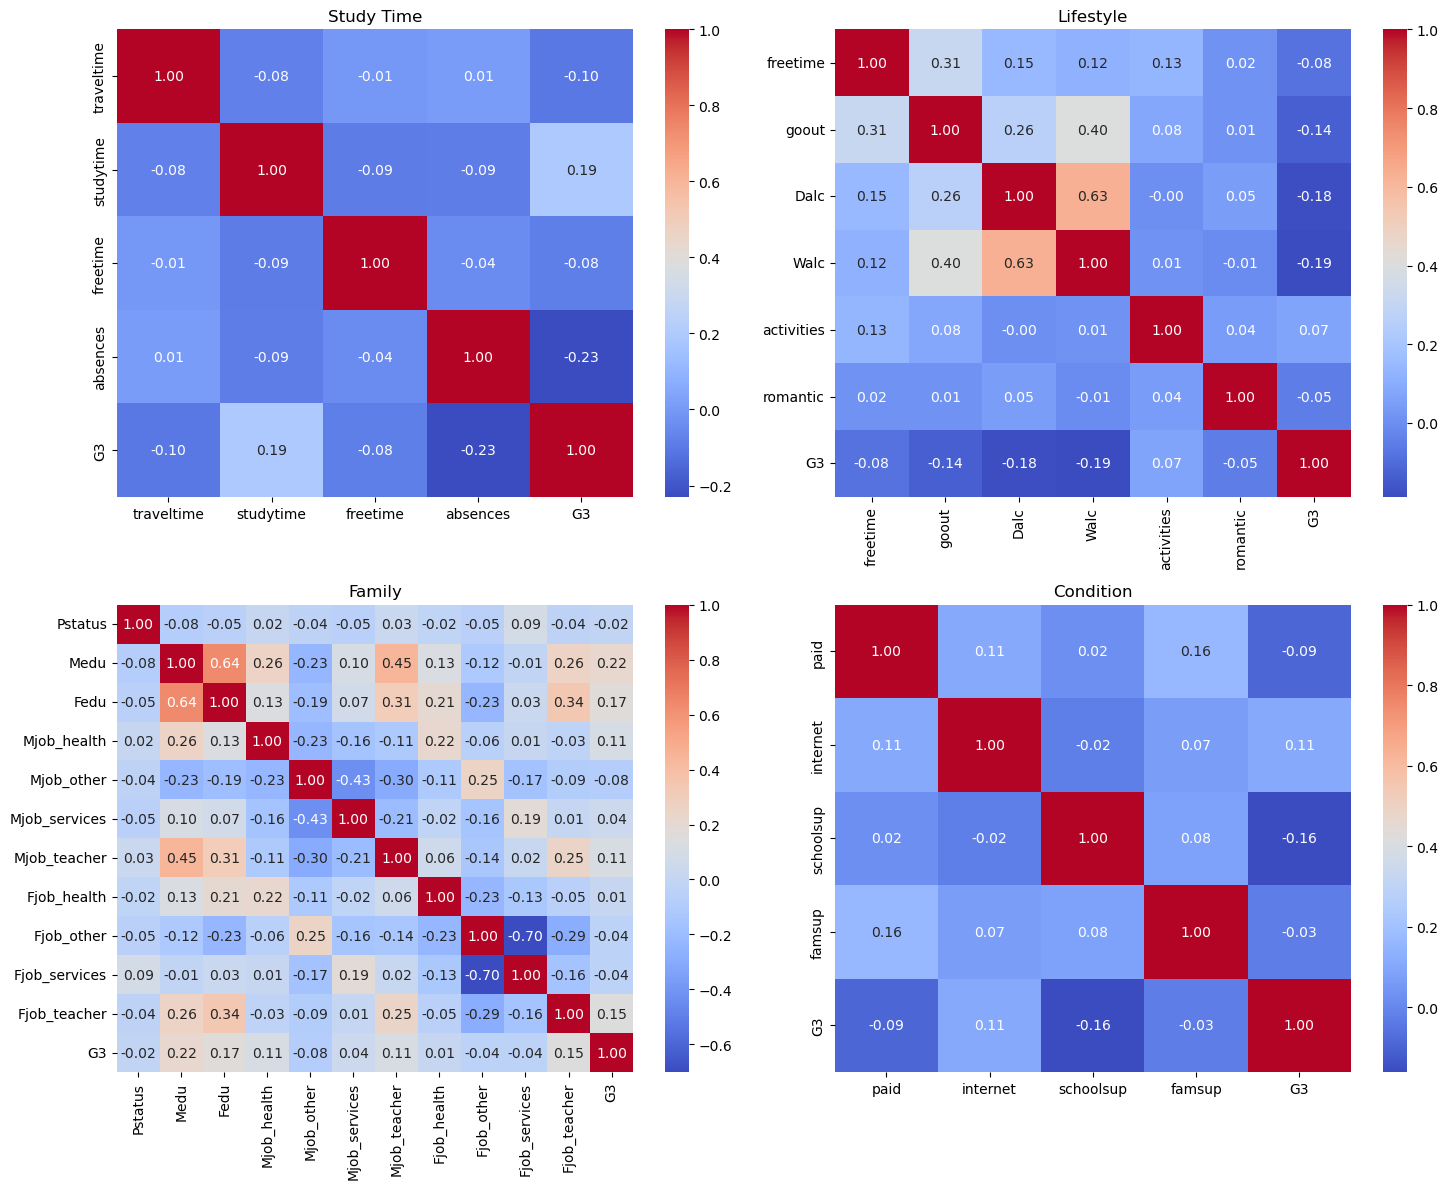

In [5]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Heatmap for Study Time features
corr_features = time_features + ['G3']
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Study Time')

# Heatmap for Lifestyle features
corr_features = lifestyle_features + ['G3']
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('Lifestyle')

# Heatmap for Family features
corr_features = family_features + ['G3']
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Family')

# Heatmap for Condition features
corr_features = condition + ['G3']
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Condition')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

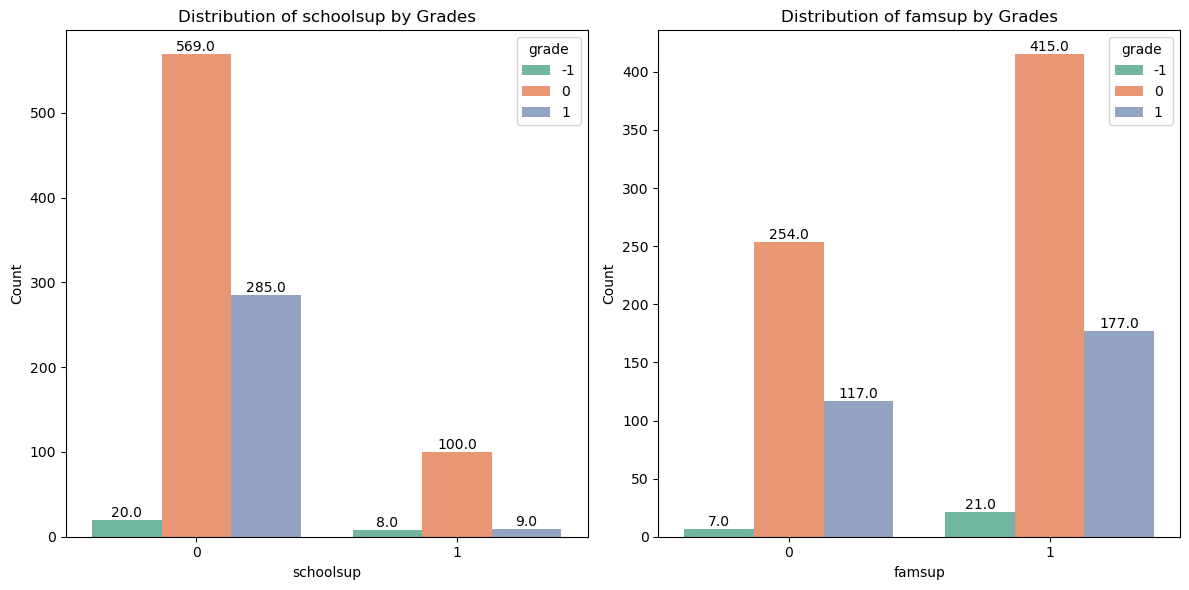

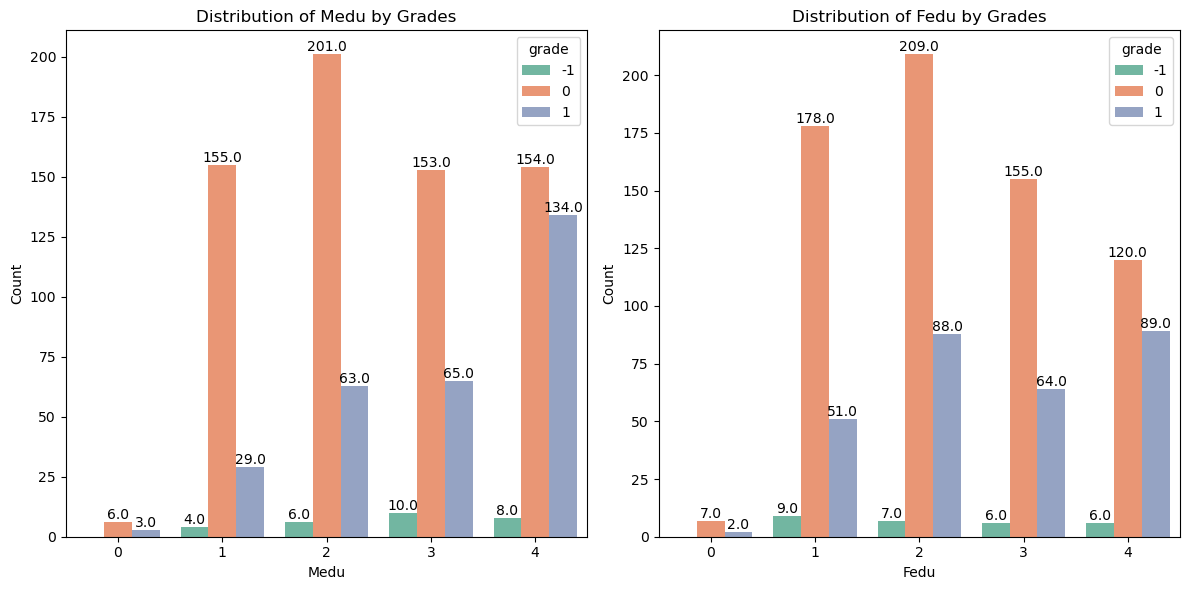

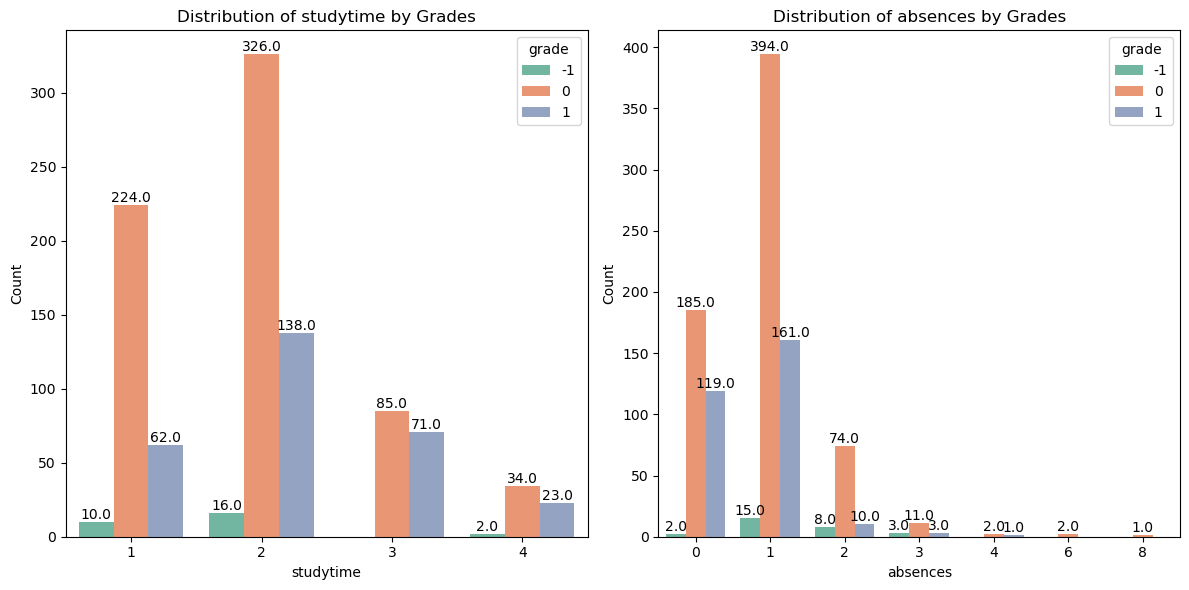

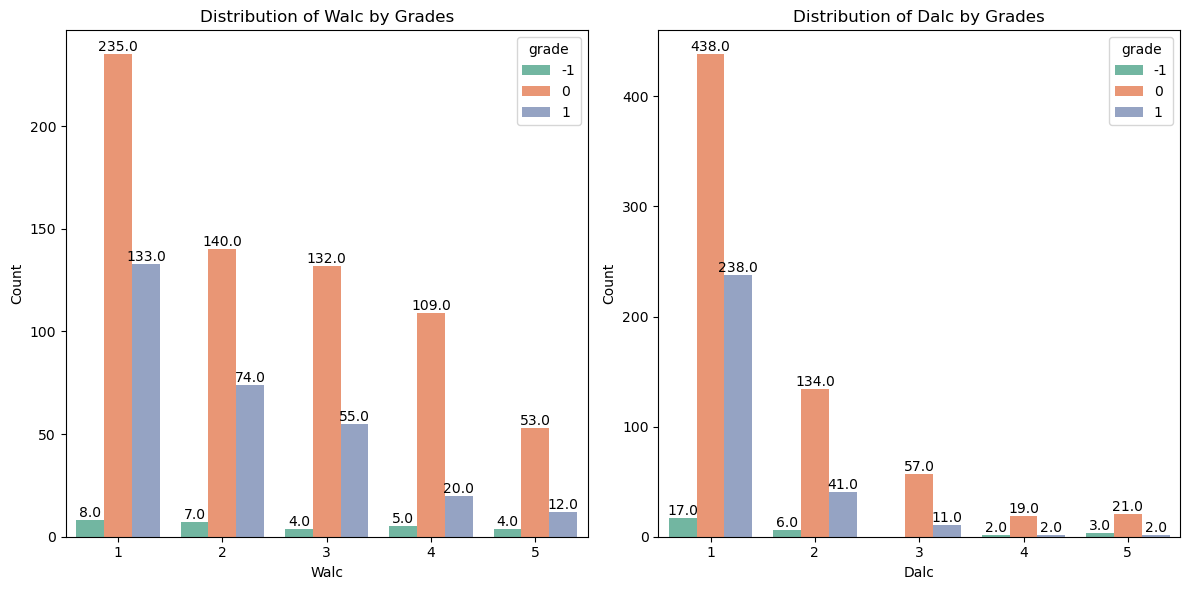

In [6]:

# Create subplots
def draw_2feat(df, feat1, feat2, grade='grade'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot 1: Distribution of schoolsup by Grades
    sns.countplot(x=feat1, hue=grade, data=df, ax=axes[0], palette='Set2')
    axes[0].set_title(f'Distribution of {feat1} by Grades')
    axes[0].set_xlabel(feat1)
    axes[0].set_ylabel('Count')

    # Plot 2: Distribution of famsup by Grades
    sns.countplot(x=feat2, hue=grade, data=df, ax=axes[1], palette='Set2')
    axes[1].set_title(f'Distribution of {feat2} by Grades')
    axes[1].set_xlabel(feat2)
    axes[1].set_ylabel('Count')

    # Add annotations to highlight positive impact of famsup
    for p in axes[1].patches:
        if p.get_height() > 0:  # Only annotate positive bars
            axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='bottom', color='black', fontsize=10)


    # Add annotations to highlight positive impact of famsup
    for p in axes[0].patches:
        if p.get_height() > 0:  # Only annotate positive bars
            axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='bottom', color='black', fontsize=10)

    plt.tight_layout()
    plt.show()

draw_2feat(df, 'schoolsup', 'famsup')
draw_2feat(df, 'Medu', 'Fedu')
draw_2feat(df, 'studytime', 'absences')
draw_2feat(df, 'Walc', 'Dalc')


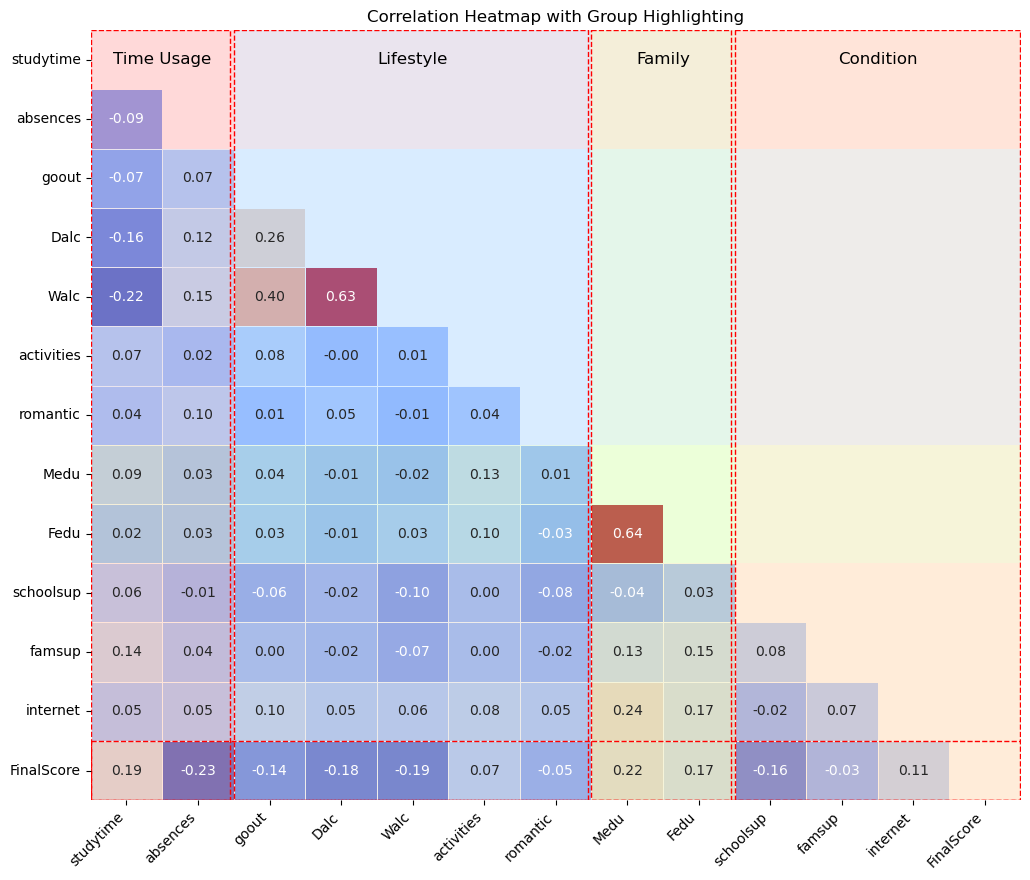

In [ ]:
import numpy as np
# Create a custom color palette for the three groups
time_features = ['traveltime', 'studytime', 'freetime', 'absences']
lifestyle_features = ['freetime', 'goout', 'Dalc', 'Walc', 'activities', 'romantic']
family_features = ['Pstatus', 'Medu', 'Fedu', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']
condition = ['paid', 'internet', 'schoolsup', 'famsup']
colors = {}
group_colors = ['#FF9999', '#99CCFF', '#CCFF99', '#FFCC99']

for feat, color in zip([time_features, lifestyle_features, family_features, condition], group_colors):
    for f in feat:
        colors[f] = color

df['FinalScore'] = df['G3']
corr_features = [
    'studytime', 'absences',
    'goout', 'Dalc', 'Walc', 'activities', 'romantic',
    'Medu', 'Fedu', 
    'schoolsup', 'famsup', 'internet',
    'FinalScore'
]
colors['FinalScore'] = '#FFCC99'

# Create a mask to highlight the diagonal and upper triangle
mask = np.triu(np.ones_like(df[corr_features].corr(), dtype=bool))

# Create the heatmap with custom annotations and color palette
plt.figure(figsize=(12, 10))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask,
            linewidths=0.5, linecolor='white', cbar=False)

# Add color patches to represent the groups
for i, group in enumerate(corr_features):
    plt.axvspan(i, i+1, facecolor=colors[group], alpha=0.2)
    plt.axhspan(i, i+1, facecolor=colors[group], alpha=0.2)

plt.text(1, 0.5, 'Time Usage', fontsize=12, ha='center', va='center')
plt.text(4.5, 0.5, 'Lifestyle', fontsize=12, ha='center', va='center')
plt.text(8, 0.5, 'Family', fontsize=12, ha='center', va='center')
plt.text(11, 0.5, 'Condition', fontsize=12, ha='center', va='center')
plt.gca().add_patch(plt.Rectangle((0, 0), 2-0.05, len(corr_features), fill=None, edgecolor='red', linestyle='--', linewidth=1))
plt.gca().add_patch(plt.Rectangle((2, 0), 5-0.05, len(corr_features), fill=None, edgecolor='red', linestyle='--', linewidth=1))
plt.gca().add_patch(plt.Rectangle((7, 0), 2-0.05, len(corr_features), fill=None, edgecolor='red', linestyle='--', linewidth=1))
plt.gca().add_patch(plt.Rectangle((9, 0), 3.99, len(corr_features), fill=None, edgecolor='red', linestyle='--', linewidth=1))

plt.gca().add_patch(plt.Rectangle((0, len(corr_features)-1), len(corr_features), 1, fill=None, edgecolor='red', linestyle='--', linewidth=1))

plt.title('Correlation Heatmap with Group Highlighting')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()